In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv', index_col='id')

# Initial look at data

In [4]:
data.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [5]:
data.isna().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

## Individual histograms

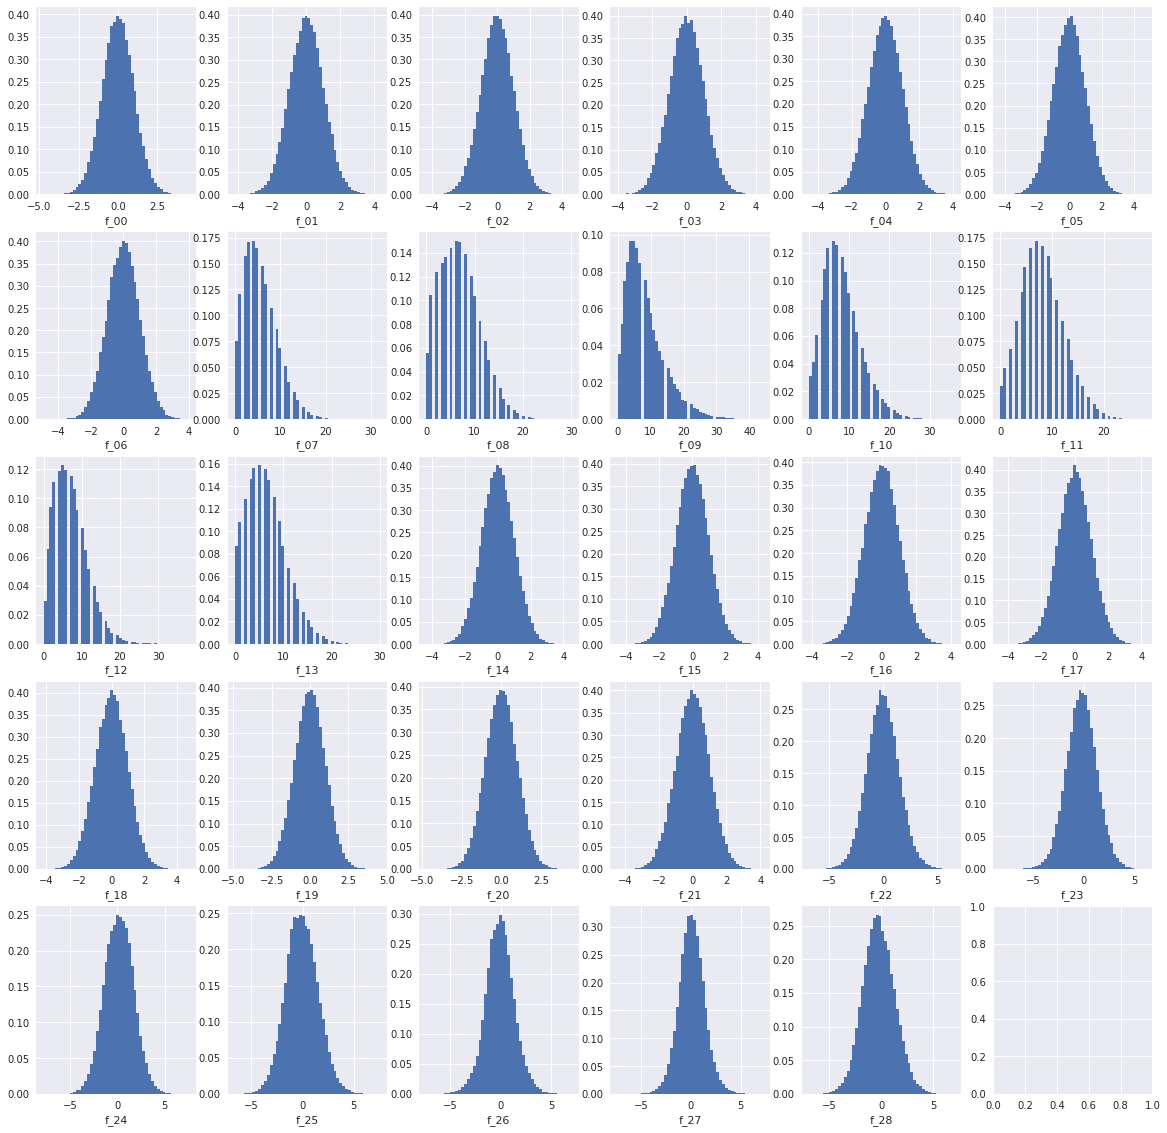

In [6]:
nrows, ncols = 5, 6
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))
ax = ax.ravel()
for i, var in enumerate(data.columns):
    bins = 50
    ax[i].hist(data[var], density=True, bins=bins)
    ax[i].set_xlabel(var)
ax = ax.reshape(nrows, ncols)
fig.show()

## Correlations

<AxesSubplot:>

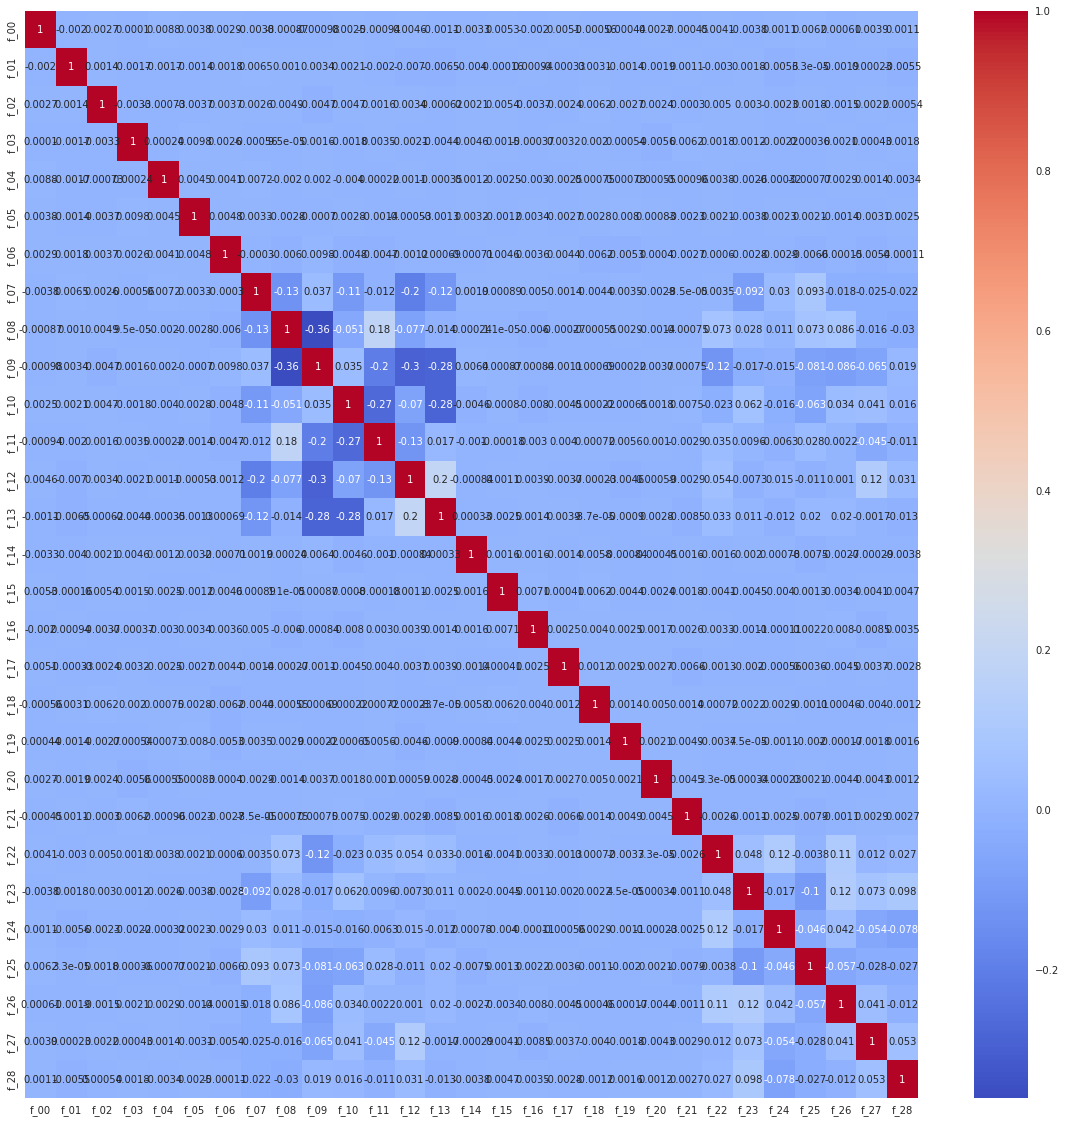

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, ax=ax, cmap=sns.color_palette("coolwarm", as_cmap=True))

* None of the features are particularly correlated
* Mixture of continuous and discrete features
* Investigate outliers

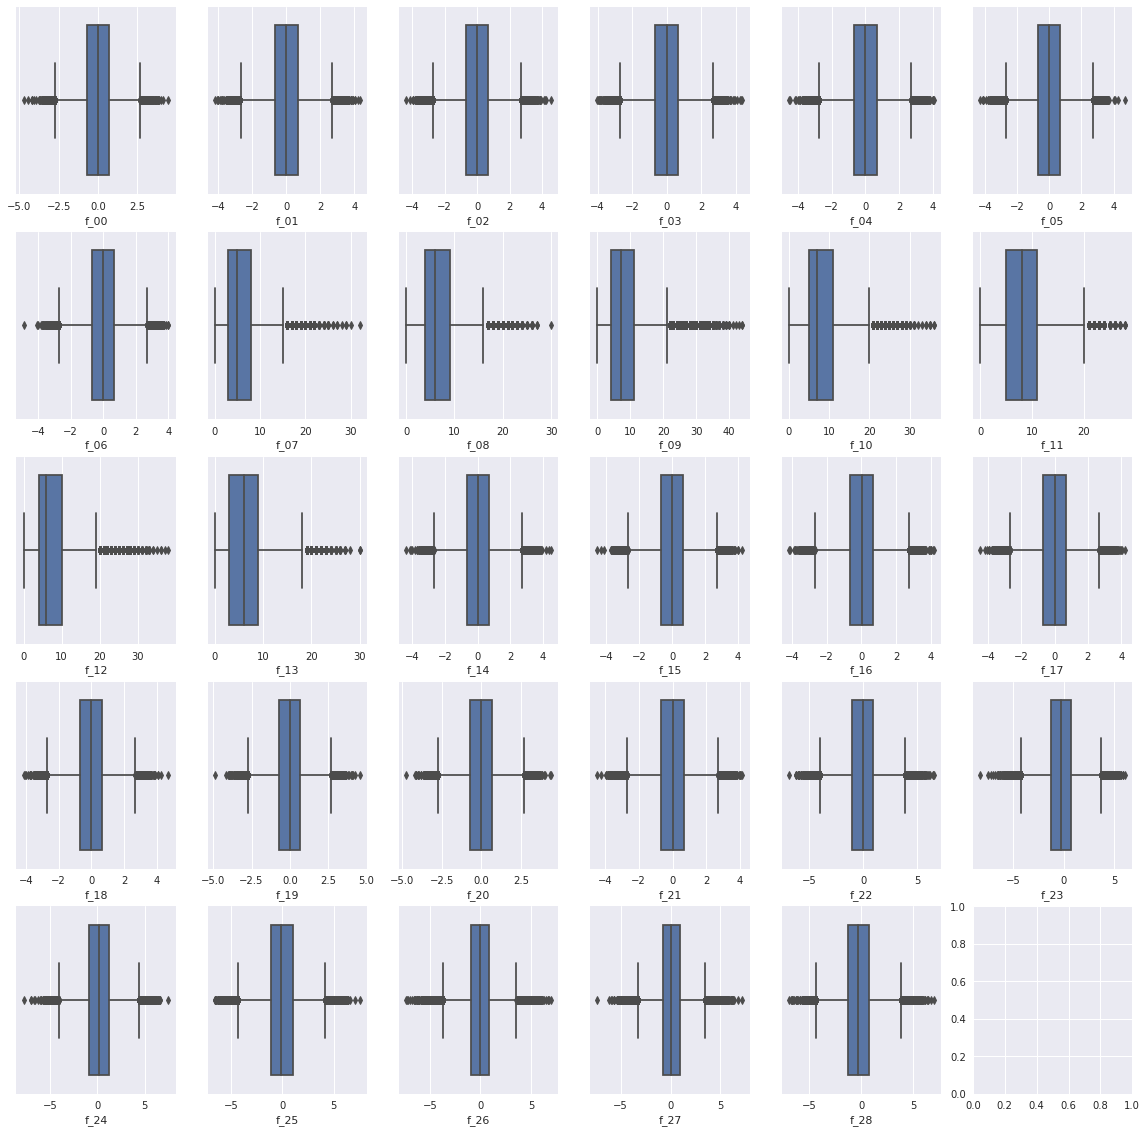

In [8]:
nrows, ncols = 5, 6
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))
ax = ax.ravel()
for i, var in enumerate(data.columns):
    # ax[i].boxplot(data[var], vert=False)
    sns.boxplot(x=data[var], ax=ax[i])
ax = ax.reshape(nrows, ncols)
fig.show()

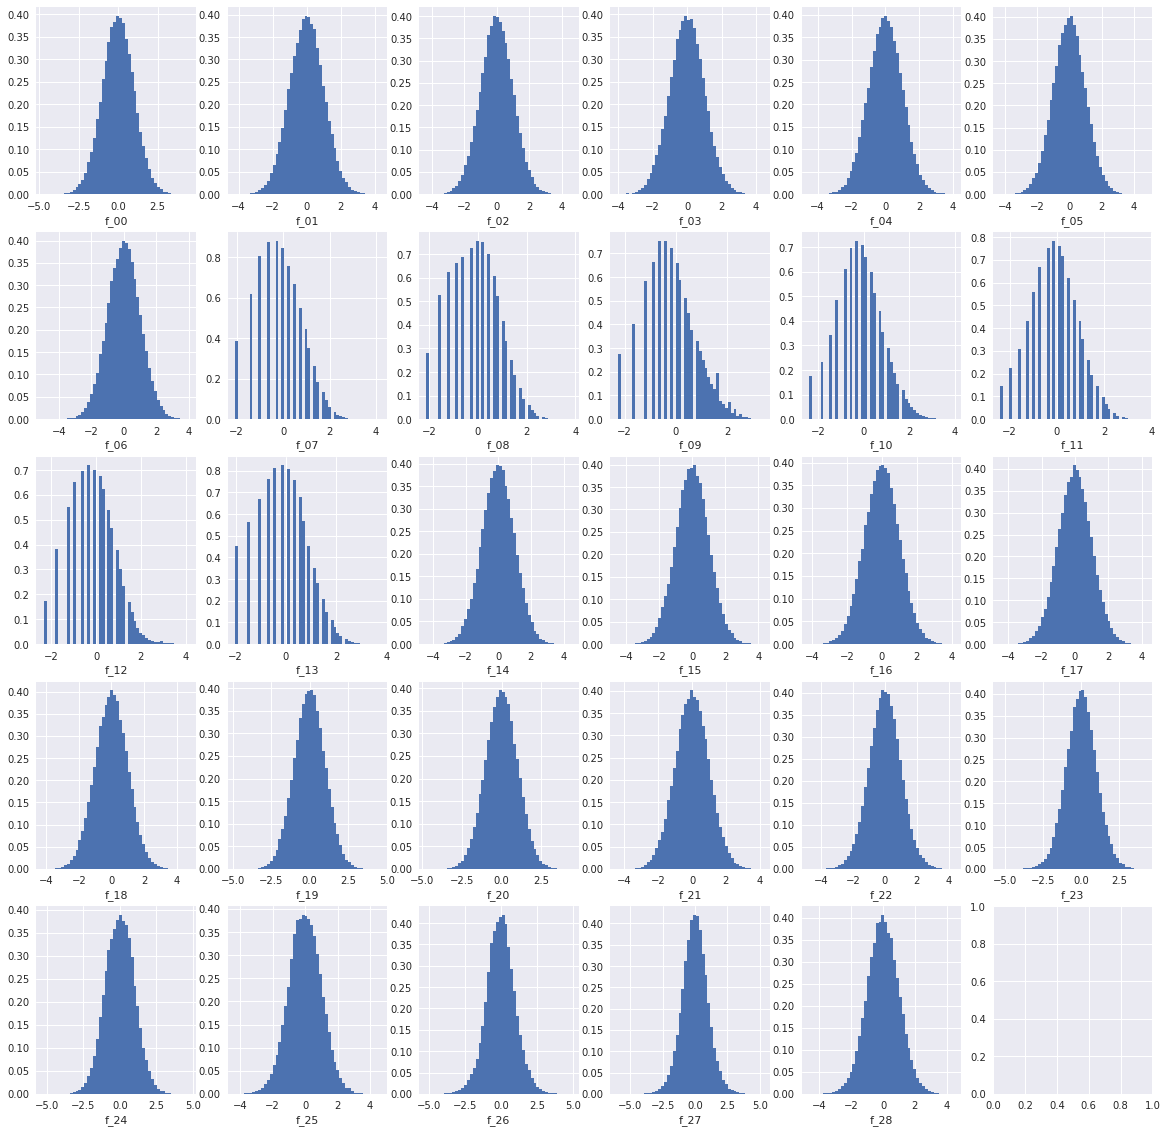

In [9]:
# try power transform to reduce outlier impact
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
data_transformed = data.copy(deep=True)
data_transformed[data.columns] = transformer.fit_transform(data_transformed[data.columns])

nrows, ncols = 5, 6
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))
ax = ax.ravel()
for i, var in enumerate(data_transformed.columns):
    bins = 50
    ax[i].hist(data_transformed[var], bins=bins, density=True)
    ax[i].set_xlabel(var)
ax = ax.reshape(nrows, ncols)
fig.show()

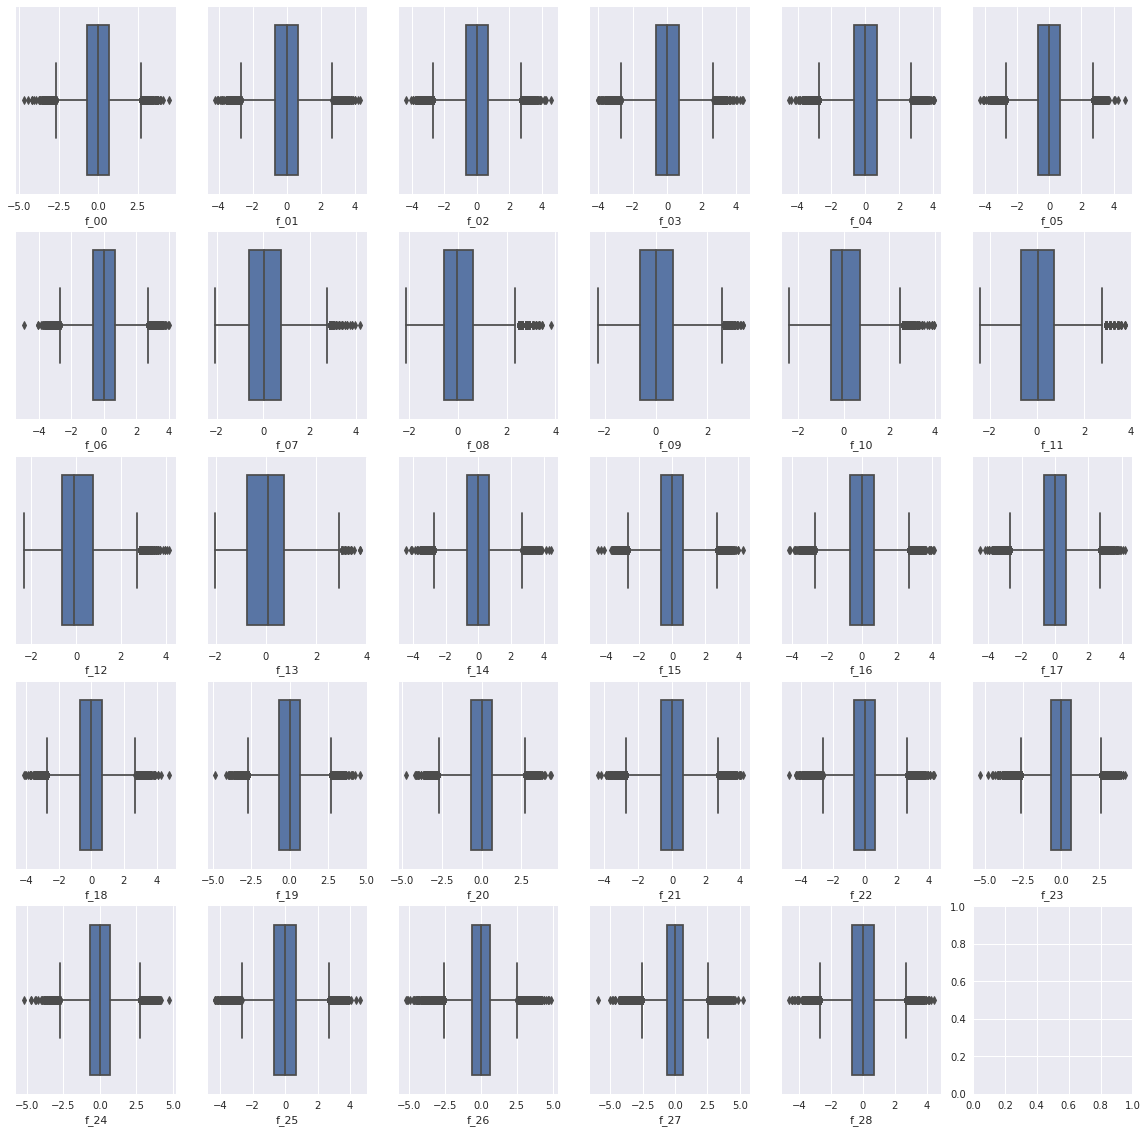

In [10]:
nrows, ncols = 5, 6
fig, ax = plt.subplots(nrows, ncols, figsize=(20, 20))
ax = ax.ravel()
for i, var in enumerate(data_transformed.columns):
    sns.boxplot(x=data_transformed[var], ax=ax[i])
ax = ax.reshape(nrows, ncols)
fig.show()

# K-means clustering

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_transformed[data_transformed.columns] = scaler.fit_transform(data_transformed[data_transformed.columns])

In [12]:
from sklearn.cluster import KMeans
CLUSTERS = 20
SEED = 42
# save inertia for "elbow plot"
inertias = list()
for cluster in range(2, CLUSTERS):
    model = KMeans(n_clusters=cluster, random_state=SEED)
    model.fit(data_transformed)
    inertias.append(model.inertia_)

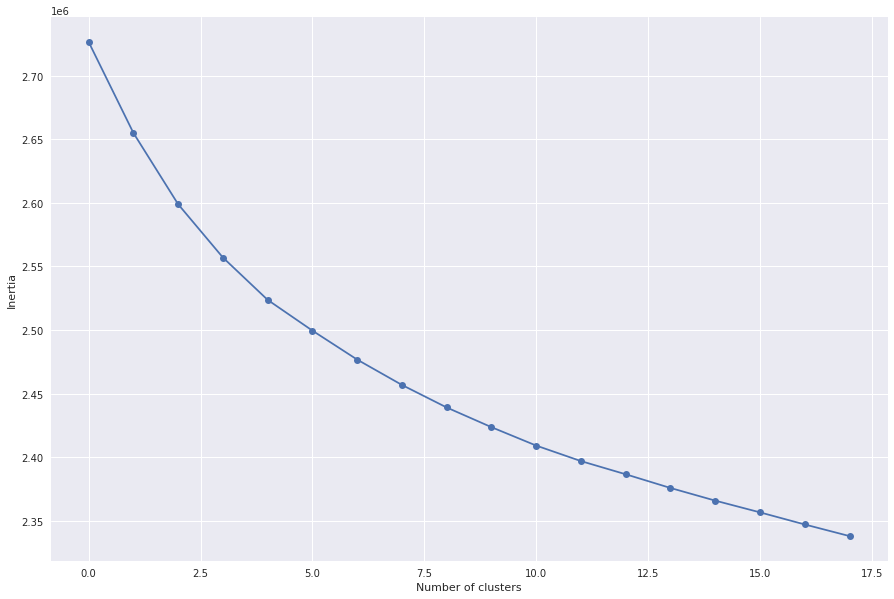

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(inertias, marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
fig.show()

# Dimensionality reduction

In [14]:
from sklearn.decomposition import PCA
N_COMPONENTS = 20
pca = PCA(n_components=N_COMPONENTS)
data_red = pca.fit_transform(data_transformed[data_transformed.columns])
pca.explained_variance_ratio_

array([0.06206551, 0.04945787, 0.0461195 , 0.04007377, 0.03967438,
       0.03611254, 0.03519837, 0.03507964, 0.03503885, 0.03486289,
       0.03479534, 0.03461623, 0.03454709, 0.03449906, 0.03441037,
       0.03434558, 0.03426849, 0.03408654, 0.03397604, 0.03379979])

In [15]:
# save inertia for "elbow plot"
inertias_red = list()
for cluster in range(2, CLUSTERS):
    model = KMeans(n_clusters=cluster, random_state=SEED)
    model.fit(data_red)
    inertias_red.append(model.inertia_)

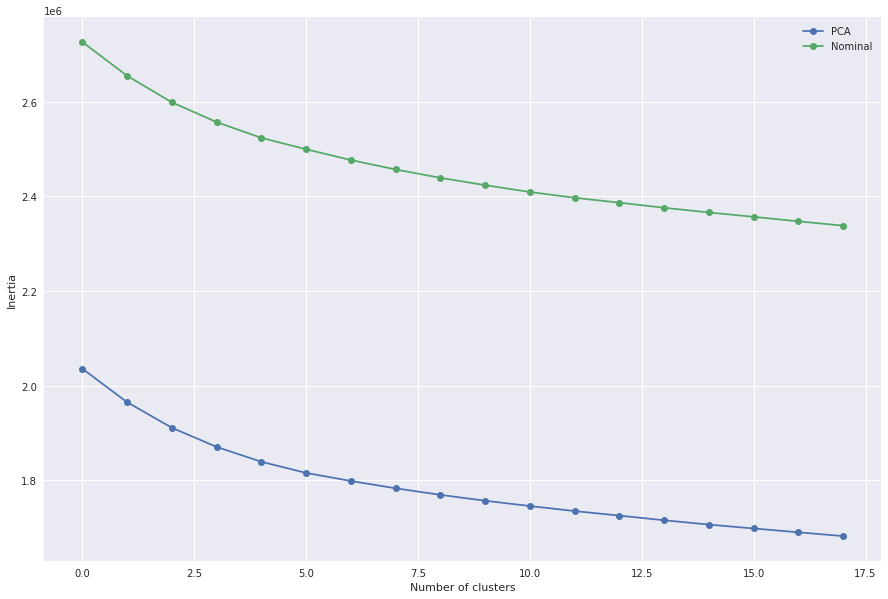

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(inertias_red, marker='o', label='PCA')
ax.plot(inertias, marker='o', label='Nominal')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.legend(loc='best')
fig.show()

# Visualise clusters

In [17]:
# arbitrary choice
model = KMeans(n_clusters=5)
model.fit(data_red)
pred = model.predict(data_red)

Text(0, 0.5, 'PC2')

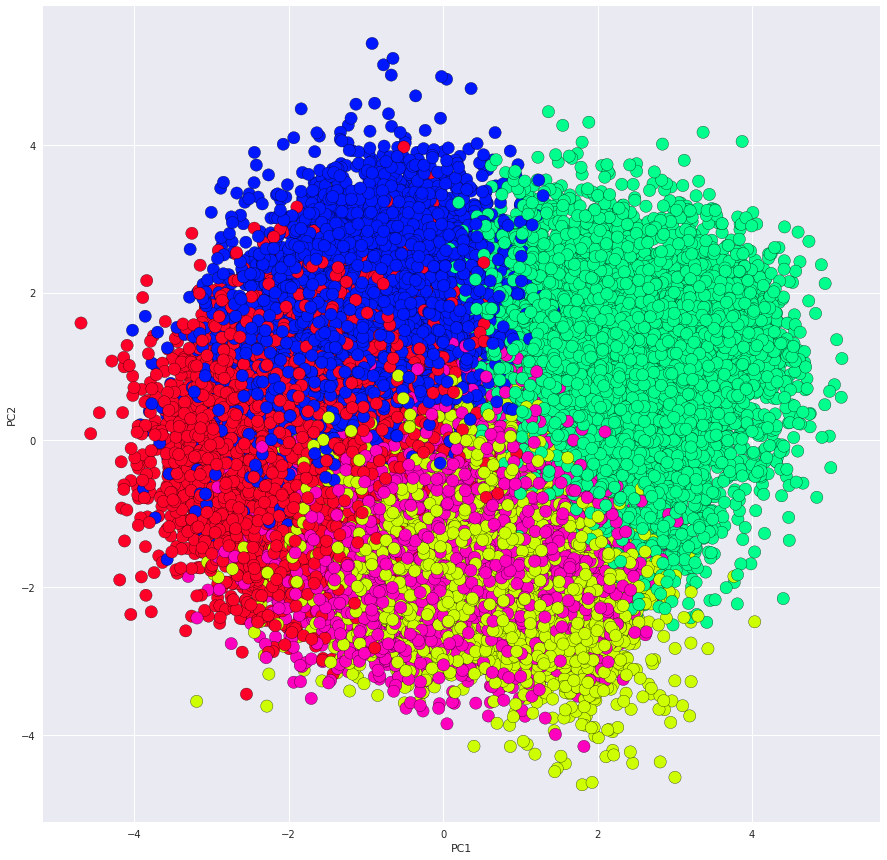

In [18]:
# plot features, colour by class
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.scatter(data_red[:, 0], data_red[:, 1], c=pred, cmap='gist_rainbow', edgecolor='k', s=150)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Submission

In [19]:
submission = pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')
submission.head()
submission["Predicted"] = pred
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,Predicted
0,0,4
1,1,0
2,2,4
3,3,2
4,4,1


In [20]:
submission['Predicted'].value_counts()

4    22971
3    20418
1    19021
0    18506
2    17084
Name: Predicted, dtype: int64